<div style="width: 100%; background-color: #222; text-align: center">
<br><br>


    
<h2 style="color: #ef7d22; font-weight: normal;">
    COVID-19 Analysis
</h2>

<br><br> 
</div>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)





The project goal is to visualize the COVID-19 pandemic and its effects.

Coronavirus (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

We will use [COVID-19 dataset](https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv), which have 8 numeric features.

* Lat: Latitude of the location
* Long: Longitude of the location
* Date: Date of cumulative report
* Confirmed: Cumulative number of confirmed cases till this day
* Deaths: Cumulative number of deaths till this day
* Recovered:Cumulative number of recovered cases till this day


### import the packages


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
%matplotlib inline 

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Load the `covid_19_clean_complete.csv` dataset and store it into `df`.

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [4]:
df.shape

(17136, 8)

Show the columns name of the resulting `df`.

In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Data exploration

Let's first see some descriptive statistics of the data:

In [6]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000
mean,22.238772,23.356497,523.227766,20.676237,160.086018
std,24.364494,71.494642,4798.964492,267.670675,2252.351806
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,8.599125,-20.026050,0.000000,0.000000,0.000000
50%,23.914900,20.921188,0.000000,0.000000,0.000000
75%,41.316075,85.953175,28.000000,0.000000,1.000000
max,71.706900,178.065000,140886.000000,10779.000000,62570.000000


What do you think? Do all the statistics make sense?

####  It is not make sense to calculate descriptive statistics for Lat and Long.

Count the number of `NaN` values in the dataset:

In [7]:
df.isnull().sum()

Province/State    11832
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

Calculate the number of active cases in a new column: `Active`.

In [8]:
# Active Case = confirmed - deaths - recovered
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Data visualization and relationships

First we need to make some changes on the date format using `datetime` library.

In [11]:
print(df['Date'].dtype)

object


In [12]:
# Convert the Date column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [13]:
print(df['Date'].dtype)

datetime64[ns]


In [14]:
from datetime import datetime as dt

df['Date'] = df['Date'].dt.normalize()
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [16]:
df['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
17131    2020-03-29
17132    2020-03-29
17133    2020-03-29
17134    2020-03-29
17135    2020-03-29
Name: Date, Length: 17136, dtype: object

In [17]:
a = df.Date.value_counts().sort_index()

print(f"The first date is: {a.index[0]}")
print(f"The last date is: {a.index[-1]}")

The first date is: 2020-01-22
The last date is: 2020-03-29


### **Visualize the total number of confirmed cases versus time**

We need to generate a new dataframe to calculate the number of total cases, and call this `total_cases`.




In [18]:
total_cases = df.groupby('Date')['Confirmed'].sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
63,2020-03-25,467653
64,2020-03-26,529591
65,2020-03-27,593291
66,2020-03-28,660706


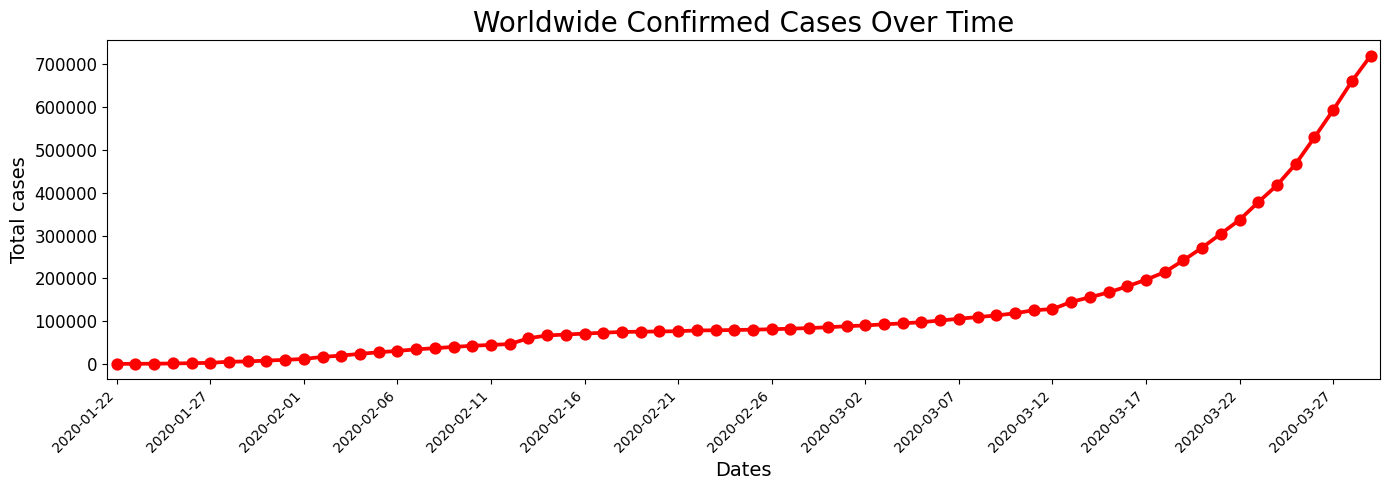

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(14, 5))

# Create a point plot for total confirmed cases over time
ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')

# Set labels for the axes
ax.set(xlabel='Dates', ylabel='Total cases')

# Format the x-axis labels (dates)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=12)  

# Set labels and title for the plot
plt.xlabel('Dates', fontsize=14)  
plt.ylabel('Total cases', fontsize=14)  
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)  

# Set x-axis ticks to show every 5th date
plt.xticks(ticks=total_cases['Date'][::5], rotation=45, ha='right')  


plt.tight_layout() 

plt.show()


### Plot of COVID-19 Deaths 

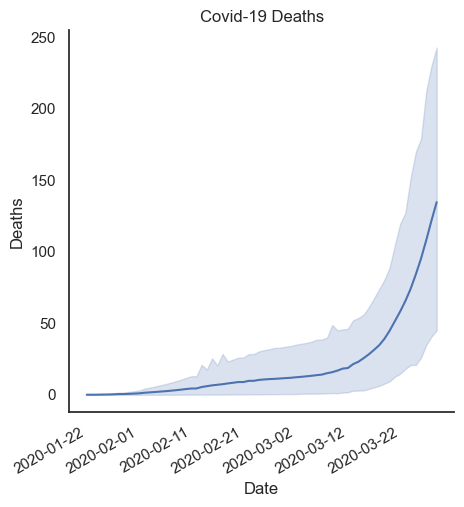

In [62]:
with sns.axes_style('white'):
    g = sns.relplot(x="Date", y="Deaths", kind="line", data=df)
    g.fig.autofmt_xdate()
    g.set_xticklabels(step=10)
    plt.title ("Covid-19 Deaths")

### Visualize the top 5 countries with the highest death 


In [55]:
total_Deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).reset_index()[:5]
total_Deaths

,Country/Region,Deaths
0,China,139177
1,Italy,92510
2,Spain,38399
3,Iran,28716
4,France,14787


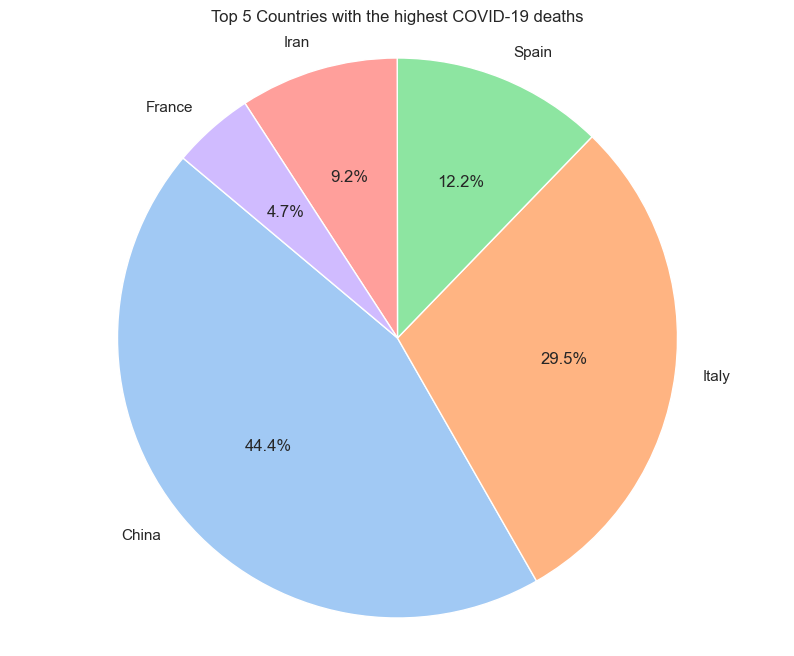

In [64]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_Deaths['Deaths'], labels=total_Deaths['Country/Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.axis('equal')

# Set title
plt.title('Top 5 Countries with the highest COVID-19 deaths', fontsize=12)
plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Visualize the top 10 countries with higher cases



In [21]:
# Select rows with the most recent date in the DataFrame
top = df.loc[df['Date'] == df['Date'].max()]
top   

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
16884,NaN,Afghanistan,33.0000,65.0000,2020-03-29,120,4,2,114
16885,NaN,Albania,41.1533,20.1683,2020-03-29,212,10,33,169
16886,NaN,Algeria,28.0339,1.6596,2020-03-29,511,31,31,449
16887,NaN,Andorra,42.5063,1.5218,2020-03-29,334,6,1,327
16888,NaN,Angola,-11.2027,17.8739,2020-03-29,7,2,0,5
...,...,...,...,...,...,...,...,...,...
17131,NaN,Burma,21.9162,95.9560,2020-03-29,10,0,0,10
17132,Anguilla,United Kingdom,18.2206,-63.0686,2020-03-29,2,0,0,2
17133,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-03-29,2,0,0,2
17134,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-03-29,4,0,0,4


In [22]:
top_casualties = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).reset_index()[:10]
top_casualties

,Country/Region,Confirmed
0,US,140886
1,Italy,97689
2,China,82122
3,Spain,80110
4,Germany,62095
5,France,40708
6,Iran,38309
7,United Kingdom,19780
8,Switzerland,14829
9,Netherlands,10930


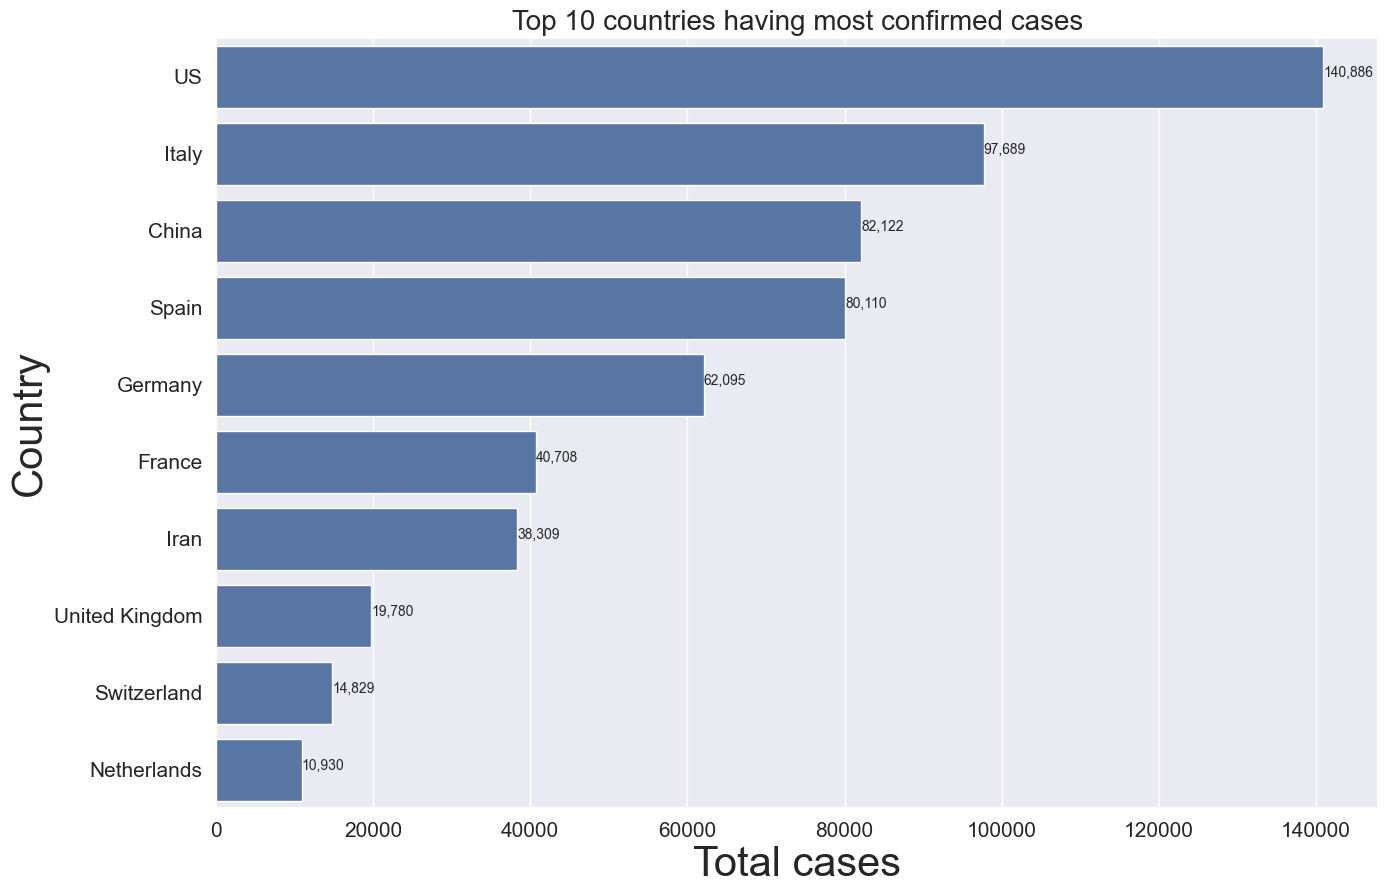

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualties['Confirmed'],
                 y=top_casualties['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualties['Confirmed'], top_casualties['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20);


![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### USA analysis

Keep just `US` data and interesting columns we'll use:

In [33]:
us_data = df.loc[df['Country/Region'] == 'US', ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
us_data

,Date,Confirmed,Deaths,Recovered,Active
225,2020-01-22,1,0,0,1
477,2020-01-23,1,0,0,1
729,2020-01-24,2,0,0,2
981,2020-01-25,2,0,0,2
1233,2020-01-26,5,0,0,5
...,...,...,...,...,...
16101,2020-03-25,65778,942,361,64475
16353,2020-03-26,83836,1209,681,81946
16605,2020-03-27,101657,1581,869,99207
16857,2020-03-28,121478,2026,1072,118380


Also, group by `Date` and remove old rows:
    

In [34]:
us_data = us_data.groupby('Date').sum().reset_index()
us_data

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
63,2020-03-25,65778,942,361,64475
64,2020-03-26,83836,1209,681,81946
65,2020-03-27,101657,1581,869,99207
66,2020-03-28,121478,2026,1072,118380


In [35]:
us_data = us_data.iloc[33:]
us_data

,Date,Confirmed,Deaths,Recovered,Active
33,2020-02-24,51,0,5,46
34,2020-02-25,51,0,6,45
35,2020-02-26,57,0,6,51
36,2020-02-27,58,0,6,52
37,2020-02-28,60,0,7,53
38,2020-02-29,68,1,7,60
39,2020-03-01,74,1,7,66
40,2020-03-02,98,6,7,85
41,2020-03-03,118,7,7,104
42,2020-03-04,149,11,7,131


Plot US's active cases over time using seaborn's `pointplot()`:


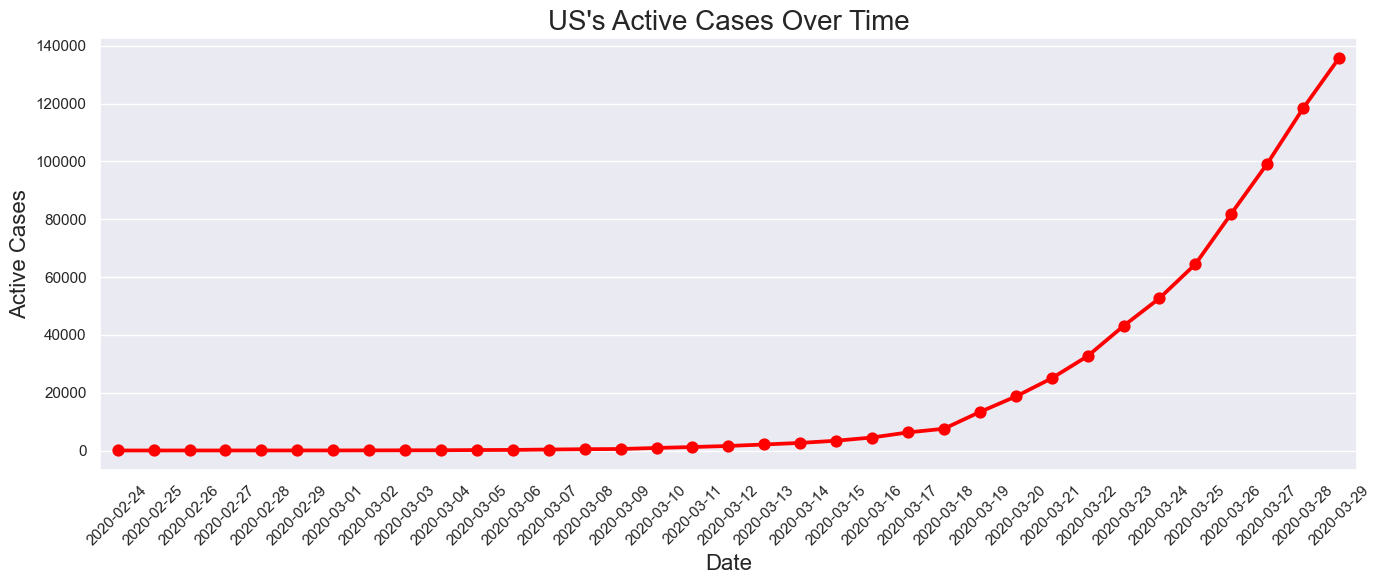

In [39]:
plt.figure(figsize=(14, 6))

# Create the point plot
sns.pointplot(x='Date', y='Active', data=us_data, color='red', marker='o')

# Set the labels and title
plt.xlabel('Date', fontsize=16)
plt.ylabel('Active Cases', fontsize=16)
plt.title("US's Active Cases Over Time", fontsize=20)

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

### Visualizing the COVID-19 Cases in the U.S. by using stacked bar chart



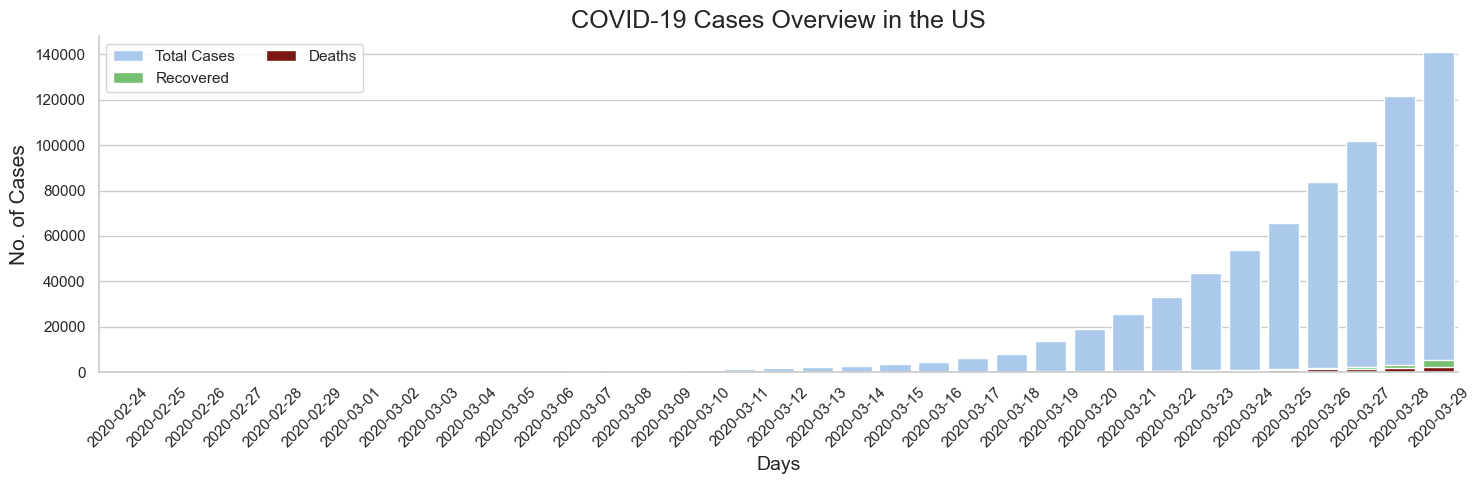

In [61]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
plt.figure(figsize=(15, 5))

# Plot the total cases 
sns.set_color_codes("pastel")
sns.barplot(x=us_data['Date'], y=us_data['Active'] + us_data['Recovered'] + us_data['Deaths'],
            label="Total Cases", color="b")

# Plot the Recovered
sns.set_color_codes("muted")
sns.barplot(x=us_data['Date'], y=us_data['Recovered']+ us_data['Deaths'],
            label="Recovered", color="g")

# Plot the Deaths
sns.set_color_codes("dark")
sns.barplot(x=us_data['Date'], y=us_data['Deaths'],
            label="Deaths", color="r")

plt.xlabel('Days', fontsize=14)
plt.ylabel('No. of Cases', fontsize=15)

plt.legend(ncol=2, loc="upper left", frameon=True)
sns.despine(top=True)


plt.title('COVID-19 Cases Overview in the US', fontsize=18)

plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()